In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import cv2
import os

Collecting Data


In [2]:
data = []
target = []
categories = ["cats", "dogs"]
data_dir = r"E:\vs code projects\CAT_DOG\training_set"
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (150, 150))
        image = np.array(img).flatten()
        data.append(image)
        target.append(i)


In [3]:
flat_data = np.array(data)

In [4]:
data = pd.DataFrame(flat_data)
data["target"] = target
data

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,target
0,40,44,39,43,44,40,48,45,41,50,...,27,34,49,29,37,50,25,35,44,cats
1,42,33,29,27,16,12,35,23,19,56,...,4,192,194,6,184,186,3,167,172,cats
2,218,223,222,219,224,223,219,224,223,217,...,208,210,214,206,212,215,211,211,217,cats
3,75,112,140,75,112,140,79,116,144,81,...,70,98,109,59,83,95,54,78,90,cats
4,8,52,55,17,50,59,20,48,60,15,...,95,150,22,104,160,31,100,157,26,cats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000,96,91,16,98,92,19,100,94,22,100,...,56,66,76,58,68,78,58,68,78,dogs
8001,29,28,24,25,24,20,24,23,19,25,...,181,189,206,176,190,206,171,189,204,dogs
8002,121,135,153,148,162,180,151,165,182,143,...,119,133,151,104,118,136,100,114,132,dogs
8003,40,91,63,41,92,64,43,94,66,44,...,58,109,88,59,111,87,59,112,85,dogs


In [5]:
x = data.drop('target', axis=1)
y = data["target"]

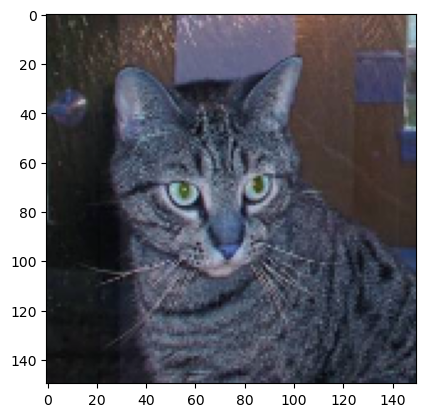

In [ ]:
plt.imshow(x.values[0].reshape(150, 150, 3))

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
lr = LogisticRegression(max_iter=500)
lr.fit(x_scaled, y)
lr.score(x_scaled, y)

c:\Users\Abd-el-Rahman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [ ]:
data = []
target = []
categories = ["cats", "dogs"]
data_dir = r"E:\vs code projects\CAT_DOG\test_set"
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (150, 150))
        image = np.array(img).flatten()
        data.append(image)
        target.append(i)

In [ ]:
test = np.array(data)


In [ ]:
test = pd.DataFrame(test)
test["target"] = target

In [ ]:
test

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,19,18,24,117,101,122,96,96,104,62,...,1,5,1,2,0,1,0,1,1,1
1,97,117,122,96,115,120,98,115,120,92,...,99,22,42,98,21,42,97,19,41,96
2,41,60,63,35,52,55,48,64,67,42,...,151,121,131,149,125,136,154,116,137,154
3,61,82,113,69,90,120,56,78,105,67,...,182,104,135,168,100,133,166,86,117,150
4,246,247,245,233,235,232,219,220,219,220,...,251,242,255,253,240,255,253,235,253,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,61,74,82,60,73,81,59,72,80,58,...,168,137,128,116,133,123,114,163,154,145
2019,75,106,95,82,113,104,101,133,126,95,...,20,48,70,44,59,79,48,51,74,36
2020,81,98,117,81,98,117,82,99,118,83,...,130,101,117,130,100,116,129,100,116,129
2021,167,169,179,165,172,179,155,166,170,138,...,176,163,170,139,159,152,114,171,186,168


In [ ]:
x_test = test.drop("target", axis=1)
y_test = test["target"]

In [ ]:
x_test = scaler.fit_transform(x_test)

In [ ]:
lr.score(x_test, y_test)

0.565002471576866

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_scaled, y)
print(dt.score(x_scaled, y))
print(dt.score(x_test, y_test))

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_scaled, y)
print(rf.score(x_scaled, y))
print(rf.score(x_test, y_test))

In [ ]:
kn = KNeighborsClassifier()
kn.fit(x_scaled, y)
print(kn.score(x_scaled, y))
print(kn.score(x_test, y_test))